## Oppgave 2. Rødt lys (15 poeng)

Vi ser på trafikkflyten på en veistrekning med posisjoner $x\in [-1000,1000]$ og tid $t\geq 0$.
Måleenhetene er meter og sekunder. 

Når $t<0$ så står alle bilene og venter ved et rødt lys ved posisjon $x=0$. Det er ingen biler ved $x>0$, og bilene står med tetthet $u_{max}$ for $x<0$. 

Når $t=0$ så blir lyset grønt, og bilene begynner å bevege seg.

Modellen beskrives (som forklart over) med:
$$
\begin{align}\tag{12}
u_t + J(u)_x = 0, \quad J(u) = u\cdot v(u)
\end{align}
$$
for $x\in [-1000,1000]$ og $t\geq 0$.

Vi bruker 
$$
\begin{align}\tag{13}
v(u) = v_{max} \left(1-\left(\frac{u}{u_{max}}\right)^p\right)
\end{align}
$$
for et tall $p\geq 1$. 

Vi antar at det ikke kommer noen nye biler inn i veistrekningen. Dvs. $u(-1000,t)=0$ for alle
verdier av $t$.

### a) Initialverdibetingelsen

Vi har initialverdibetingelsen $u(x,0)=u_0(x)$ som beskriver tettheten av biler mens det er rødt lys.

Skriv ned en formel som beskriver $u_0(x)$, og tegn en skisse til denne funksjonen.

Diskuter grafen, og forklar hvorfor grafen ser ut slik den gjør.

### b) Verdiene $v_{max}$ og $u_{max}$ og randbetingelsen for $x=1000$.

Dere må selv velge noen passende (og realistiske) verdier for verdiene $v_{max}$ og $u_{max}$ og forklare hvorfor dere mener dette er gode verdier. Dere kan ta utgangspunkt i vanlige biler på vanlige norske veier.

Vi trenger også en randbetingelse $u(1000, t)$. Forklar hva det betyr for trafikken på veien for $x>1000$ hvis vi antar $u(1000,t)=0$? Hva sier det om trafikken for $x>1000$ hvis $u(1000,t)=u_{max}$?

Dere skal bruke randbetingelsen $u(1000, t)=0$ i fortsettelsen.

### c) Løs differensiallikningen

Løs likning $[12]$ ved hjelp av Lax-Friedrichs sin metode for de tre ulike verdiene $p=1,2,5$. Du finner flere eksempler på Lax-Friedrichs sin metode i notatbøkene; se spesielt notat 6.2 om <i>Lax-Friedrichs metode og bevaringslover</i>.

Lag animasjoner som viser hvordan $u(x,t)$ endrer seg med hensyn på tiden. Beskriv i rapporten hva som skjer. (Du trenger ikke ta med animasjonene i rapporten).

Svar deretter på d) og e) for hver av de tre verdiene av $p$.

### d) Bevegelsen til en enkelt bil

La $V(t)$ og $P(t)$ beskrive hastigheten og posisjonen til en bil som befinner seg ved $x=-1000$ på veien. 
Regn ut $V(t)$ og $P(t)$, og tegn grafen til disse. 

For å løse problemet så må du bruke at:

1. $P(0)=-1000$ og $V(0)=0$ 
2. $V(t)=v(u(P(t), t))$
3. $P(t + \Delta t) = P(t) + \Delta t\cdot V(t)$

### e) Hastigheten til en kø

La $K(t)$ være posisjonen til bilen som starter å bevege seg ved tid $t$.

Finn $K(t)$, og tegn grafen.

Hva er tiden $t$ når alle bilene er i bevegelse?

### f) Valg av parameter $p$

Med utgangspunkt i svarene fra c) og d) og Oppgave 1 f), forklar hvordan ulike valg av $p\geq 1$ beskriver ulike valg for kjøreatferd i trafikkmodellen. 

In [2]:
#kodeblokk for oppgave 2
print("Hei igjen Emil!!!")

Hei igjen Emil!!!


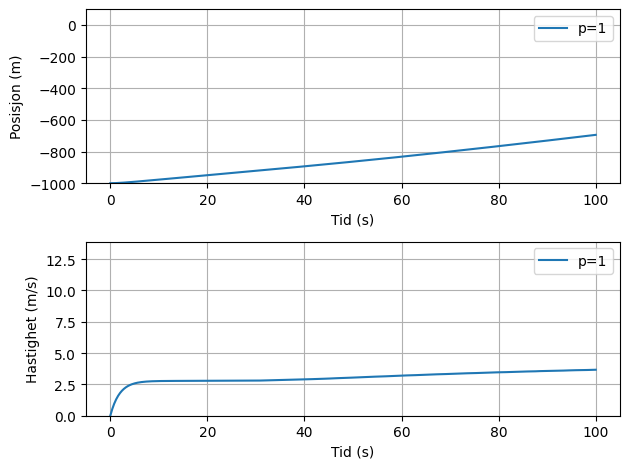

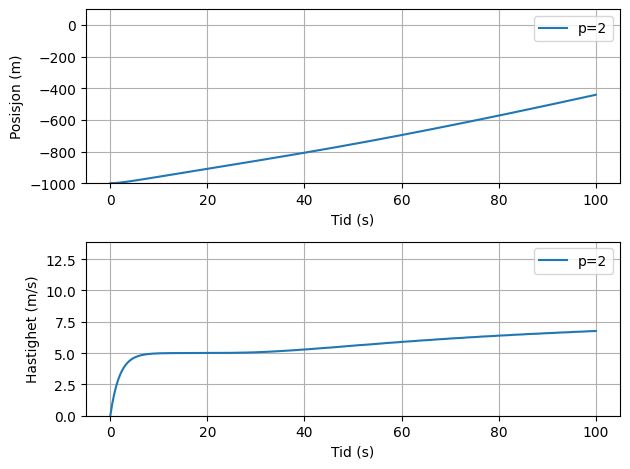

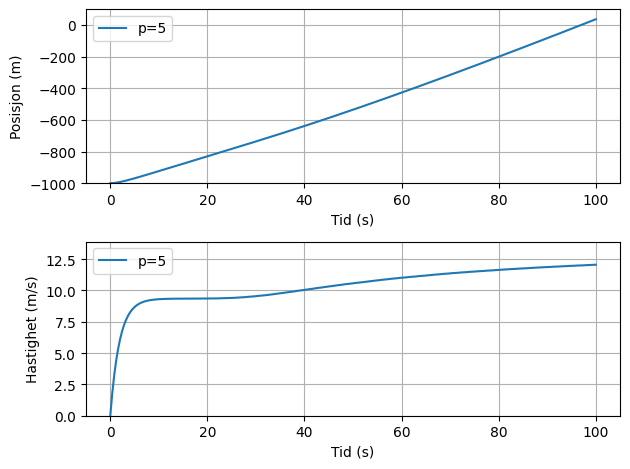

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Parametere
L = 2000  # Veilengde (m)
Nx = 100  # Antall romlige punkter
T = 100    # Simuleringstid (s)
Nt = 500  # Antall tidssteg

v_max = 13.9  # Maksimal hastighet (m/s)
u_max = 0.19 # Maksimal tetthet (biler per meter)
p_values = [1, 2, 5]  # Verdier for p

dx = L / Nx  # Romlig oppløsning
dt = T / Nt  # Tidsoppløsning
lambda_ = dt / dx  # CFL-tall (må være <= 1 for stabilitet)

# Funksjoner for hastighet og fluks
def velocity(u, p):
    return np.where(u < u_max, v_max * (1 - (u / u_max) ** p), 0)

def flux(u, p):
    return u * velocity(u, p)

# Initialtilstand for tetthet
u = np.zeros(Nx)
for j in range(Nx):
    if j < Nx // 2:
        u[j] = 0.8 * u_max  # Tettere trafikk i venstre halvdel

# Lax-Friedrichs metode for å beregne u(x,t)
U = np.zeros((Nt, Nx))
U[0, :] = u.copy()

for n in range(Nt - 1):
    for p in p_values:
        F = flux(U[n, :], p)
        U[n+1, 1:-1] = 0.5 * (U[n, :-2] + U[n, 2:]) - (lambda_ / 2) * (F[2:] - F[:-2])
    # Randbetingelser (absorberende kanter)
    U[n+1, 0] = U[n+1, 1]
    U[n+1, -1] = U[n+1, -2]

# Bilens bevegelse
P0 = -1000  # Startposisjon
V0 = 0      # Starthastighet

for p in p_values:
    P = [P0]
    V = [V0]
    
    for n in range(Nt - 1):
        # Finn tettheten u(P(t), t) ved bilens posisjon
        idx = int((P[-1] + L/2) / dx)  # Konverter posisjon til indeks
        idx = max(0, min(Nx-1, idx))  # Sikre at vi ikke går utenfor
        u_p = U[n, idx]
        
        # Oppdater hastighet og posisjon, akselerer gradvis
        V_new = V[-1] + dt * (velocity(u_p, p) - V[-1]) / 2  # Gradvis akselerasjon
        P_new = P[-1] + dt * V_new if V_new > 0 else P[-1]  # Beveger seg kun hvis hastighet > 0
        
        V.append(V_new)
        P.append(P_new)
    
    # Plot resultater
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(np.linspace(0, T, Nt), P, label=f'p={p}')
    plt.xlabel('Tid (s)')
    plt.ylabel('Posisjon (m)')
    plt.ylim(-1000,100)
    plt.legend()
    plt.grid(True)
    
    
    plt.subplot(2, 1, 2)
    plt.plot(np.linspace(0, T, Nt), V, label=f'p={p}')
    plt.xlabel('Tid (s)')
    plt.ylabel('Hastighet (m/s)')
    plt.ylim(0, v_max)
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()